# Data get

In [2]:
import kagglehub

/opt/anaconda3/envs/emailspam/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshanyounas001/email-spam-detection")

print("Path to dataset files:", path)

100%|██████████| 418k/418k [00:00<00:00, 4.60MB/s]

Extracting files...
Path to dataset files: /Users/suweilin/.cache/kagglehub/datasets/zeeshanyounas001/email-spam-detection/versions/2


In [4]:
! mv /Users/suweilin/.cache/kagglehub/datasets/zeeshanyounas001/email-spam-detection/versions/2 ./data

# data analysis

In [81]:
import pandas as pd
import torch
import numpy as np

In [82]:
kaggle_data = pd.read_csv('data/spam mail.csv')
kaggle_data

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
kaggle_data['label'] = kaggle_data['Category'].apply(lambda x: 0 if x=='ham' else 1)
kaggle_data.rename(columns={'Masseges':'text', 'label':'label_num','Category':'label'}, inplace=True)
kaggle_data

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


## method 1
- https://medium.com/@amnahhmohammed/natural-language-processing-for-emails-9c1cf5f74f48

In [84]:
import imaplib
import email
import codecs
import string
from transformers import AutoTokenizer, pipeline

KeyboardInterrupt: 

## method 2
- https://www.geeksforgeeks.org/nlp/detecting-spam-emails-using-tensorflow-in-python/

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suweilin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
# ! conda env export > emailspam.yml

### 資料處理與訓練模型

In [113]:
data = pd.read_csv('data/spam_ham_dataset_geeksforgeeks.csv')
#data.rename(columns={'label':'Category', 'label_num':'label'}, inplace=True)
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


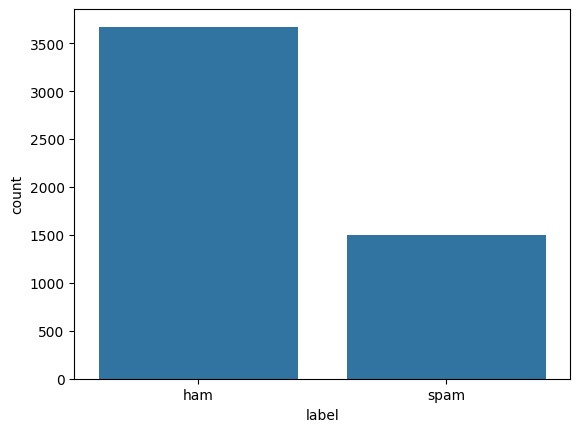

In [114]:
sns.countplot(x='label', data=data)
plt.show()

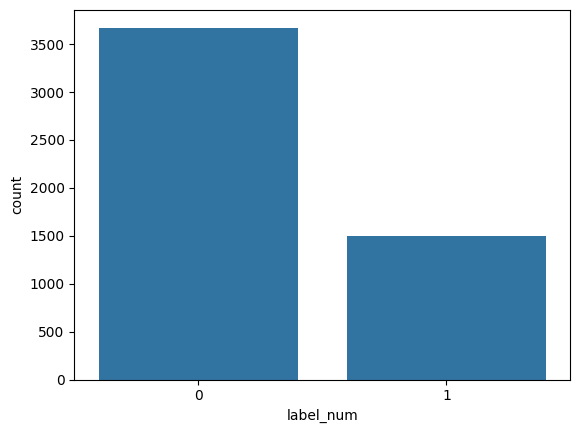

In [115]:
sns.countplot(x='label_num', data=data)
plt.show()

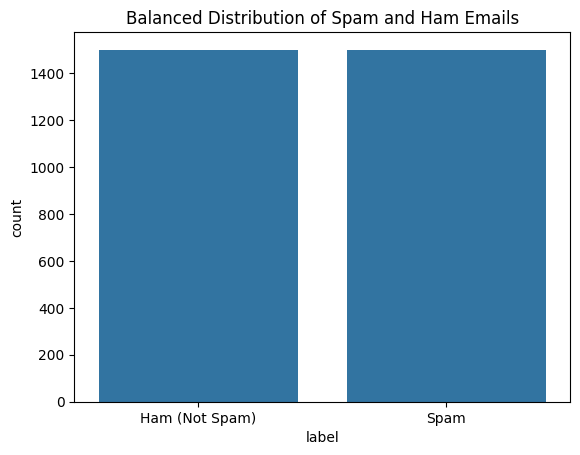

In [116]:
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine balanced data
balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.title("Balanced Distribution of Spam and Ham Emails")
plt.xticks(ticks=[0, 1], labels=['Ham (Not Spam)', 'Spam'])
plt.show()

In [ ]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [118]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,": conoco - big cowboy darren : ' sure help , '...",0
1,2982,ham,: feb 01 prod : sale teco gas processing sale ...,0
2,2711,ham,": california energy crisis california  , powe...",0
3,3116,ham,": : nom / actual volume april 23 rd agree "" ei...",0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


### visualization

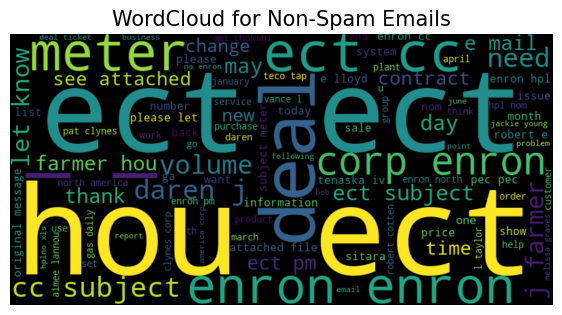

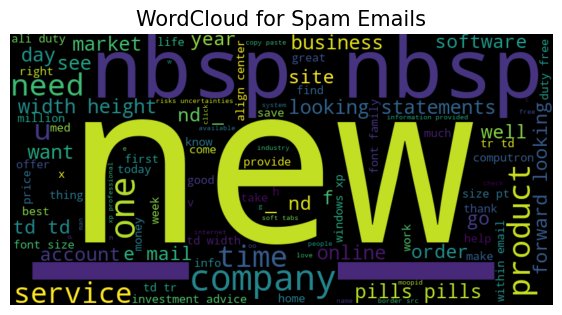

In [119]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    wc = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], typ='Spam')

### modeling

In [133]:
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100  # Maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

train_Y = (train_Y == 'spam').astype(int)
test_Y = (test_Y == 'spam').astype(int)

In [134]:
train_X

1569    : long time customer id : 615 order # 13 would...
2228    : quick look ever rent buy adult dvd store ? d...
2295    : extra - time - last 5 - 10 times longer ! ex...
1800    : ! ! ! exciuslve - oun - g models ! ! ! : ) h...
1273    : registration welcome email thank registering...
                              ...                        
1638    : friend password amazing adult site . usernam...
1095    : : formosa meter # : 1000 deal continue month...
1130    : august known hot deals ! dear golfboxx . com...
1294    : enron actuals june 12 , 2000 teco tap 117 . ...
860     : amazon . com order ( # 104 - 9670681 - 03255...
Name: text, Length: 2398, dtype: object

In [135]:
train_sequences

array([[ 307,   49,  418, ...,    0,    0,    0],
       [ 714,  243,  524, ...,    0,    0,    0],
       [1711,   49,  210, ...,    0,    0,    0],
       ...,
       [ 360, 1061,  831, ...,  386,  684,  746],
       [   4,  374,  289, ...,    0,    0,    0],
       [1830,    6,  108, ...,   11, 1556, 1129]], dtype=int32)

In [136]:
train_sequences.shape

(2398, 100)

In [137]:
train_Y

1569    1
2228    1
2295    1
1800    1
1273    0
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: label, Length: 2398, dtype: int64

In [138]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [139]:
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20,
    batch_size=32,
    callbacks=[lr, es]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5642 - loss: 0.6853 - val_accuracy: 0.6717 - val_loss: 0.6119 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9362 - loss: 0.2408 - val_accuracy: 0.9583 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9646 - loss: 0.1545 - val_accuracy: 0.9567 - val_loss: 0.1770 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9691 - loss: 0.1370 - val_accuracy: 0.9600 - val_loss: 0.1668 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9683 - loss: 0.1382 - val_accuracy: 0.9483 - val_loss: 0.1977 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9595 - loss: 0.1645 - val_accuracy: 0.9717 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9825 - loss: 0.0881 - val_acc

In [140]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9817 - loss: 0.0900
Test Loss : 0.08997628092765808
Test Accuracy : 0.9816666841506958


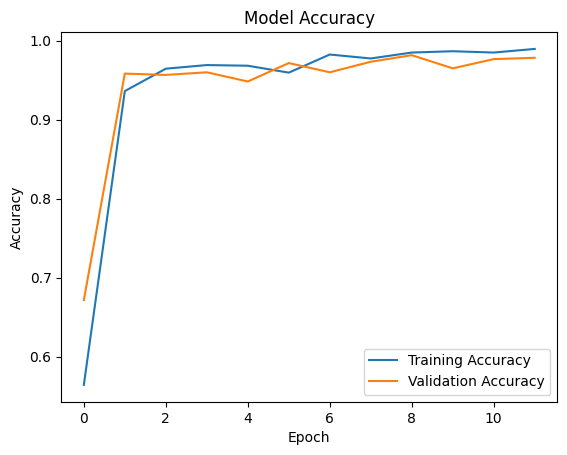

In [141]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [142]:
model.save('model/geeksforgeeks_emailspam.h5')
import pickle
with open("model/geeksforgeeks_tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

### 拿其他資料來測試模型

In [143]:
import pandas as pd
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# --- 步驟一：載入已保存的資產 ---
# 在進行推論前，必須先載入訓練時保存的 Tokenizer 物件和模型
# 這與 GeeksforGeeks 文章中提到的步驟是獨立的，且至關重要 [1]
try:
    # 載入已訓練好的模型
    model = load_model('model/geeksforgeeks_emailspam.h5')

    # 載入在訓練階段保存的 Tokenizer 物件
    with open('model/geeksforgeeks_tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)

    # 載入訓練時使用的序列長度。假設你已經將其保存為變數或在訓練腳本中記錄
    max_len = 100 

except FileNotFoundError:
    print("錯誤：找不到模型或 Tokenizer 文件。請確保在訓練後已保存 'spam_model.h5' 和 'tokenizer.pkl'。")
    exit()

# --- 步驟二：載入並前置處理 Kaggle 資料集 ---
kaggle_data = pd.read_csv('data/spam mail.csv')
kaggle_data.rename(columns={'Masseges':'text', 'Category':'label'}, inplace=True)

# 執行與訓練時完全相同的文字清理步驟 [1]
# 這一步在你的原始程式碼中遺漏了，但它是將原始文本轉化為模型可理解格式的必要步驟。
def clean_text(text):
    text = str(text).replace('Subject:', '').strip()
    # 這裡應該加入移除標點符號和停用字的具體程式碼，
    # 需與訓練腳本中的實現完全一致 [1]。
    # 這裡我們用一個簡化的版本來展示流程。
    return text

def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output

kaggle_data['text'] = kaggle_data['text'].str.replace('Subject', '')
kaggle_data['text_cleaned'] = kaggle_data['text'].apply(lambda text: remove_stopwords(text))

# --- 步驟三：使用已載入的 Tokenizer 進行轉換 ---
# 僅對新資料進行轉換，不重新 fit。這確保了我們使用訓練時的詞彙表映射。
vali_sequences = tokenizer.texts_to_sequences(kaggle_data['text_cleaned'])

# 使用已載入的 max_len 進行補零，以確保序列長度與模型輸入層一致 [1]
vali_sequences = pad_sequences(vali_sequences, maxlen=max_len, padding='post', truncating='post')

# --- 步驟四：準備標籤資料並進行評估 ---
# 將 'ham'/'spam' 標籤轉換為 0/1 的數值格式
vali_Y = kaggle_data['label'].apply(lambda x: 0 if x == 'ham' else 1)

# 執行模型評估
test_loss, test_accuracy = model.evaluate(vali_sequences, vali_Y)
print('Test Loss :', test_loss)
print('Test Accuracy :', test_accuracy)

175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2094 - loss: 2.9870
Test Loss : 2.98698091506958
Test Accuracy : 0.20944005250930786
